In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **doan**

In [ ]:
# import zipfile
# import os

# # Đường dẫn tới file zip cần giải nén
# zip_file_path = '/content/drive/MyDrive/hand_anno.zip'

# # Đường dẫn tới thư mục để giải nén
# extract_to_path = '/content/drive/MyDrive/'

# # Tạo thư mục để giải nén nếu nó không tồn tại
# os.makedirs(extract_to_path, exist_ok=True)

# # Giải nén file zip
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to_path)

# print("File zip đã được giải nén vào thư mục:", extract_to_path)


File zip đã được giải nén vào thư mục: /content/drive/MyDrive/


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt

from keras import layers
from keras.layers import LSTM, Dense, Dropout, Conv2D, Conv3D, MaxPooling2D, Activation, Dropout, Flatten, Input, MultiHeadAttention, Embedding, BatchNormalization, Add, Input, ZeroPadding2D, GlobalAveragePooling2D
from keras.callbacks import LearningRateScheduler
# import keras_nlp
from keras.utils import to_categorical, plot_model
from keras.models import load_model
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint



import imutils

from sklearn.model_selection import train_test_split
# from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def test_predict(test_img):
    labels = ["5", "6", "7", "8", "9"]
    img = cv2.imread(test_img)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resize = cv2.resize(img_rgb, (256, 256))
    img_arr = np.asarray(img_resize)
    img_arr = np.expand_dims(img_arr, axis=0) #Thêm chiều None (batch_size) vào [(None, 160, 160, 3)] để phù hợp vs model

    print('Shape test', img_arr.shape)
    pred = loaded_model.predict(img_arr)
    print(pred)
    itemindex = np.where(pred == np.max(pred))
    print('itemindex:{}'.format(itemindex))
    prediction = itemindex[1][0]
    print("probability: " + str(np.max(pred) * 100) + "%\nPredicted class : ", labels[prediction])

    img = cv2.imread(test_img)
    plt.imshow(img)

In [ ]:
def read_data(pathCSV, pathImage, classes):
  images = []
  bboxes = []
  labels = []

  df = pd.read_csv(pathCSV, header = None)
  for index, row in df.iterrows():
    name = row[0]
    label = (row[3])
    x1 = int(row[4])
    y1 = int(row[5])
    x2 = int(row[6])
    y2 = int(row[7])
    label_name = classes[label-1]
    image = os.path.join(pathImage, label_name, name)
    bbox = [x1,y1,x2,y2]
    images.append(image)
    bboxes.append(bbox)
    labels.append(label)

In [ ]:
def split_data(pathCSV, pathImage, classes, split):
  train_images, train_bboxes, train_labels = read_data(pathCSV, pathImage, classes)

  #split: training, val
  split_size = int(len(train_images) * split)

  train_images, valid_images = train_test_split(train_images, test_size=split_size)
  train_bboxes, valid_bboxes = train_test_split(train_bboxes, test_size=split_size)
  train_labels, valid_labels = train_test_split(train_labels, test_size=split_size)

  test_images, test_bboxes, test_labels = load_data(path, classes, train=False)

  return (train_images, train_bboxes, train_labels), (valid_images, valid_bboxes, valid_labels), (test_images, test_bboxes, test_labels)


In [ ]:
def read_sample(path, bbox, label_index):
  image = cv2.imread(path, cv2.IMREAD_COLOR)
  h, w, _ = image.shape
  image = cv2.resize(image, (256, 256))
  image = (image - 127.5)/127.5
  image = image.astype(np.float32)

  x1, y1, x2, y2 = bbox

  norm_x1 = float(x1/w)
  norm_y1 = float(y1/h)
  norm_x2 = float(x2/w)
  norm_y2 = float(y2/h)
  norm_bbox = np.array([norm_x1, norm_y1, norm_x2, norm_y2], dtype=np.float32)

  label = [0] * num_classes
  label[label_index - 1] = 1
  class_label = np.array(label, dtype=np.float32)

  return image, norm_bbox, class_label

In [ ]:
# label = ["5", "6", "7", "8", "9"]
# print(np.array(label))
# num_classes = 5

# label_5 = []
# label_6 = []
# label_7 = []
# label_8 = []
# label_9 = []


# # folder ảnh
# folder_path_5 = '/content/drive/MyDrive/HandDetection/data_hand/hand5'
# folder_path_6 = '/content/drive/MyDrive/HandDetection/data_hand/hand6'
# folder_path_7 = '/content/drive/MyDrive/HandDetection/data_hand/hand7'
# folder_path_8 = '/content/drive/MyDrive/HandDetection/data_hand/hand8'
# folder_path_9 = '/content/drive/MyDrive/HandDetection/data_hand/hand9'



# resized_images_5 = read_and_resize_blur_images(folder_path_5)
# resized_images_6 = read_and_resize_blur_images(folder_path_6)
# resized_images_7 = read_and_resize_blur_images(folder_path_7)
# resized_images_8 = read_and_resize_blur_images(folder_path_8)
# resized_images_9 = read_and_resize_blur_images(folder_path_9)

# img_data_5 = []
# img_data_6 = []
# img_data_7 = []
# img_data_8 = []
# img_data_9 = []



# for i in range(len(resized_images_5)):
#     img_data_5.append(np.asarray(resized_images_5[i]))
#     label_5.append("5")
# img_data_arr_5 = np.array(img_data_5)
# img_label_arr_5 = np.asarray(label_5)

# for i in range(len(resized_images_6)):
#     img_data_6.append(np.asarray(resized_images_6[i]))
#     label_6.append("6")
# img_data_arr_6 = np.array(img_data_6)
# img_label_arr_6 = np.asarray(label_6)

# for i in range(len(resized_images_7)):
#     img_data_7.append(np.asarray(resized_images_7[i]))
#     label_7.append("7")
# img_data_arr_7 = np.array(img_data_7)
# img_label_arr_7 = np.asarray(label_7)

# for i in range(len(resized_images_8)):
#     img_data_8.append(np.asarray(resized_images_8[i]))
#     label_8.append("8")
# img_data_arr_8 = np.array(img_data_8)
# img_label_arr_8 = np.asarray(label_8)

# for i in range(len(resized_images_9)):
#     img_data_9.append(np.asarray(resized_images_9[i]))
#     label_9.append("9")
# img_data_arr_9 = np.array(img_data_9)
# img_label_arr_9 = np.asarray(label_9)



# print("bla", )
# # print("img_data", len(img_data_arr_5))
# # print("label_5", (img_label_arr_5.shape))

# # print("img_data_6", len(img_data_arr_6))
# # print("label_6", len(img_label_arr_6))

# img_label_arr_5 = np.expand_dims(img_label_arr_5, axis=1)
# img_label_arr_6 = np.expand_dims(img_label_arr_6, axis=1)
# img_label_arr_7 = np.expand_dims(img_label_arr_7, axis=1)
# img_label_arr_8 = np.expand_dims(img_label_arr_8, axis=1)
# img_label_arr_9 = np.expand_dims(img_label_arr_9, axis=1)


# # print("label_5dọaoidasf", img_label_arr_5)

# img_data_arr = np.concatenate((img_data_arr_5, img_data_arr_6, img_data_arr_7, img_data_arr_8, img_data_arr_9))
# label_arr = np.concatenate((img_label_arr_5, img_label_arr_6, img_label_arr_7, img_label_arr_8, img_label_arr_9))
# # print('qqqqqqqqqqqqqq',label_arr)
# df = pd.DataFrame(label_arr)
# print(df)

# label_arr = to_categorical(np.asarray(df[0].factorize()[0])) # để thành (400,2)
# # print(label_arr)
# # arr_reshaped = np.expand_dims(img_data_arr, axis=0)
# # print("hetttttt")
# # print(arr_reshaped.shape)
# # label = np.asarray(label)
# X = img_data_arr
# y = label_arr

# # Chuẩn hóa dữ liệu về miền giá trị [0,1] sử dụng phương pháp min-max scaling
# # X = X.astype("float32")/255

# print(X.shape)
# print(y.shape)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = True)
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

['5' '6' '7' '8' '9']


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/HandDetection/data_hand/hand5'

In [ ]:
train_generator = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True, rotation_range=30, br)
test_generator = ImageDataGenerator()

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

NameError: name 'ImageDataGenerator' is not defined

# **read**

bbbbb

In [2]:
# prompt: giải nén file zip

import zipfile
import os

# Path to the zip file
zip_file_path = "/content/drive/MyDrive/test_data.zip"

# Path to extract the files to
extract_to_path = "/content/drive/MyDrive/"

# Create the target directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files to the target directory
    zip_ref.extractall(extract_to_path)

print("Zip file extracted successfully to:", extract_to_path)


Zip file extracted successfully to: /content/drive/MyDrive/


In [ ]:
!pip install keras-nightly

In [4]:
import os

os.environ["KERAS_BACKEND"] = "jax"  # @param ["tensorflow", "jax", "torch"]


import numpy as np
import keras
from keras import layers
# from keras import ops
import matplotlib.pyplot as plt

import numpy as np
import cv2
import os
import scipy.io
import shutil

In [5]:
from keras.utils import image_dataset_from_directory
from keras.applications.resnet import preprocess_input, decode_predictions
from pathlib import Path
# import .pyimagesearch

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelBinarizer

# import numpy as np
# import pandas as pd
# import cv2
# import os
# import matplotlib.pyplot as plt

from keras import layers
from keras.layers import LSTM, Dense, Dropout, Conv2D, Conv3D, MaxPooling2D, Activation, Dropout, Flatten, Input, MultiHeadAttention, Embedding, BatchNormalization, Add, Input, ZeroPadding2D, GlobalAveragePooling2D
from keras.callbacks import LearningRateScheduler
# import keras_nlp
from keras.utils import to_categorical
from keras.models import load_model
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint



import imutils

# from keras.preprocessing.image import ImageDataGenerator

In [6]:
BASE_PATH = "/content/drive/MyDrive/data_final2"
TRAIN_PATH = 'train'
# VALID_PATH = 'Dataset'
TEST_PATH = '/content/drive/MyDrive/test_data'

# CLASSES = ['5', '6', '7', '8', '9']
# seed_train_validation = 1
# train_ds, val_ds = image_dataset_from_directory(Path.cwd() / BASE_PATH,
#                                              subset="both",
#                                              image_size=(128, 128),
#                                              batch_size=32,
#                                              validation_split=0.1,
#                                             #  color_mode = 'grayscale',
#                                              seed = seed_train_validation,
#                                              label_mode='categorical',
#                                                 shuffle = True)


test_ds = image_dataset_from_directory(Path.cwd() / TEST_PATH,
                                            # subset = 'test',
                                            image_size=(128, 128),
                                            batch_size=32,
                                            # seed = seed_train_validation,
                                            label_mode='categorical')


Found 592 files belonging to 5 classes.


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [3]:
BASE_PATH = "/content/drive/MyDrive/data_final"
IMAGES_PATH = os.path.sep.join([BASE_PATH, "train"])
ANNOTS_PATH = os.path.sep.join([BASE_PATH, "annotations"])

In [ ]:
def get_data(height, width):
    images = []
    labels = []
    bboxes = []
    count = 0
    # Lấy danh sách các file trong thư mục ANNOTATIONS_PATH
    csvFileNames = os.listdir(ANNOTS_PATH)
    # Duyệt qua các file CSV để đọc dữ liệu
    for csvFileName in csvFileNames:

        # Mở file CSV
        csvPath = os.path.join(ANNOTS_PATH, csvFileName)
        with open(csvPath, 'r') as f:
            rows = f.read().strip().split("\n")
            print(rows)
        # Đọc từng dòng
        for row in rows:
            # Lấy thông tin file ảnh
            (filename, class_name ,h, w, x1, y1, x2, y2, classes) = row.split(",")

            # Đọc file ảnh với hàm opencv
            imagePath = os.path.join(IMAGES_PATH, filename)
            if os.path.exists(imagePath):
                # print("Reading image:", imagePath)
                image = cv2.imread(imagePath)
                if image is not None:
                    count += 1
                    print(count)
                    # print("Image shape:", image.shape)
                    (h, w, depth) = image.shape

                    # Chuẩn hóa về miền giá trị [0..1]
                    x1 = float(x1) / w
                    y1 = float(y1) / h
                    x2 = float(x2) / w
                    y2 = float(y2) / h
                    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = load_img(imagePath, target_size=(height, width),
                                    #  color_mode='rgb',
                                    #  grayscale=True
                                     )
                    image = img_to_array(image)


                    # Load lại ảnh với hàm load_img với kích thước height, width
                    # image = cv2.resize(image, (width, height))
                    # image = image.astype('float32') / 255.0    # Sử dụng cv2.resize để thay đổi kích thước

                    images.append(image)
                    labels.append(classes)
                    bboxes.append((x1, y1, x2, y2))
            else:
                print("Image not found:", imagePath)

    return images, labels, bboxes

# Sử dụng hàm get_data với các đường dẫn được cung cấp
images, labels, bboxes = get_data(128, 128)
print("Data:", len(images))


['filename,width,height,class_name,xmin,ymin,xmax,ymax,classes', 'img0279_png.rf.ffd79ac800edc966af320908bac55cf7.jpg,640,640,hand,238,56,417,403,5', 'img0909_png.rf.03154cff9ec90ba152da1ef293f5ce50.jpg,640,640,hand,169,27,449,626,5', 'img0326_png.rf.0518a785f89152231de121e598b55c53.jpg,640,640,hand,17,9,523,640,5', 'img0074_png.rf.004434e55d452478a86ceb00f74a5d17.jpg,640,640,hand,158,135,446,414,5', 'img0554_png.rf.00c0ef5aaf864a9bc4a8f09f7818c81d.jpg,640,640,hand,224,154,442,554,5', 'img0635_png.rf.03a53e831e442cd3abd49f0e702c8324.jpg,640,640,hand,219,162,436,543,5', 'img0016_png.rf.026ffd07e928af424c6e637690a7cb18.jpg,640,640,hand,146,69,416,640,5', 'img0253_png.rf.0263cbcbe87039f703a3c789558cbeda.jpg,640,640,hand,248,75,431,400,5', 'img0936_png.rf.06945daf212aed0736bb397c73ffd3b0.jpg,640,640,hand,189,54,472,633,5', 'img0939_png.rf.05a8a469084d8a4ef467b3e18b1592b1.jpg,640,640,hand,176,61,461,631,5', 'img0363_png.rf.01c2328a2c9af8286c57e73c13144f81.jpg,640,640,hand,360,283,531,518,5'

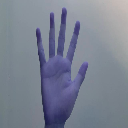

5
(0.2640625, 0.0421875, 0.7015625, 0.978125)


In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(images[1])
print(labels[1])
print(bboxes[1])

In [ ]:
def preprocess_input(images, labels, bboxes):
 # Chuyển các dữ liệu về numpy số thực
 # Chuyển ảnh về miền giá trị [0..1]
 images = np.array(images, dtype='float32')/255.0
 labels = np.array(labels)
 bboxes = np.array(bboxes)

 # one-hot encoding các labels
 lb = LabelBinarizer()
 labels = lb.fit_transform(labels)

 # Chia thành 2 tập: train và valid
 images_train, images_valid = train_test_split(images, test_size=0.1)
 labels_train, labels_valid = train_test_split(labels, test_size=0.1)
 bboxes_train, bboxes_valid = train_test_split(bboxes, test_size=0.1)

 return (images_train,labels_train,bboxes_train), (images_valid,labels_valid,bboxes_valid)
if __name__ == "__main__":
#  images, labels, bboxes = get_data(224, 224)
#  print("Data: ", len(images))

 (images_train,labels_train,bboxes_train), (images_valid,labels_valid,bboxes_valid) = preprocess_input(images, labels, bboxes)
 print("Train: ", len(images_train))
 print("Valid: ", len(images_valid))


In [6]:
images_train

array([[[[0.5921569 , 0.5764706 , 0.53333336],
         [0.5921569 , 0.5764706 , 0.53333336],
         [0.5921569 , 0.5764706 , 0.53333336],
         ...,
         [0.7411765 , 0.76862746, 0.80784315],
         [0.7490196 , 0.7764706 , 0.8156863 ],
         [0.7490196 , 0.7764706 , 0.8156863 ]],

        [[0.5921569 , 0.5764706 , 0.53333336],
         [0.5921569 , 0.5764706 , 0.53333336],
         [0.5921569 , 0.5764706 , 0.53333336],
         ...,
         [0.7411765 , 0.76862746, 0.80784315],
         [0.7490196 , 0.7764706 , 0.8156863 ],
         [0.7490196 , 0.7764706 , 0.8156863 ]],

        [[0.5921569 , 0.5764706 , 0.53333336],
         [0.5921569 , 0.5764706 , 0.53333336],
         [0.5921569 , 0.5764706 , 0.53333336],
         ...,
         [0.7372549 , 0.7647059 , 0.8039216 ],
         [0.7411765 , 0.76862746, 0.80784315],
         [0.7411765 , 0.76862746, 0.80784315]],

        ...,

        [[0.5294118 , 0.49803922, 0.45490196],
         [0.5294118 , 0.49803922, 0.45490196]

bbbbb

In [5]:
import tensorflow as tf
normalization_layer = tf.keras.layers.Rescaling(1./255)


In [6]:
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

image_batch, labels_batch = next(iter(train_ds))

first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.32156864 0.91372555


In [ ]:
# images_train = np.expand_dims(images_train, axis=0)  # Thêm một chiều ở cuối
# labels_train = np.expand_dims(labels_train, axis=0)  # Thêm một chiều ở cuối
# bboxes_train = np.expand_dims(bboxes_train, axis=0)

In [ ]:
# import numpy as np

# # Loại bỏ chiều thừa từ tensor hình ảnh chuẩn hóa
# bboxes_train = np.squeeze(bboxes_train)
# # images_valid = np.squeeze(images_valid)


In [ ]:
bboxes_train.shape

(5009, 4)

In [ ]:
images_train_ds = tf.data.Dataset.from_tensor_slices((images_train, labels_train, bboxes_train)).batch(5009)
images_valid_ds = tf.data.Dataset.from_tensor_slices((images_valid, labels_valid, bboxes_valid)).batch(5009)

In [ ]:
images_train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.int64, name=None), TensorSpec(shape=(None, 4), dtype=tf.float64, name=None))>

In [ ]:
# Sử dụng map để thêm chiều vào tensor hình ảnh
# images_train = images_train.map(lambda x, y, z: (tf.expand_dims(x, axis=0), tf.expand_dims(y, axis=0), tf.expand_dims(z, axis=0)))
# images_valid = images_valid.map(lambda x, y, z: (tf.expand_dims(x, axis=0), tf.expand_dims(y, axis=0), tf.expand_dims(z, axis=0)))



In [ ]:
images_train_ds = images_train_ds.map(lambda x, y, z: (normalization_layer(x), y, z))
images_valid_ds = images_valid_ds.map(lambda x, y, z: (normalization_layer(x), y, z))

image_batch, labels_batch, bboxes_batch = next(iter(images_train_ds))

first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.3254902 0.909804


In [ ]:
images_train

<_MapDataset element_spec=(TensorSpec(shape=(1, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1, 5), dtype=tf.int64, name=None), TensorSpec(shape=(1, 4), dtype=tf.float64, name=None))>

# **MLP**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 Dense_1 (Dense)             (None, 1024)              50332672  
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 Dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 Output (Dense)              (None, 5)                 5125      
                                                                 
Total params: 51387397 (196.03 MB)
Trainable params: 5

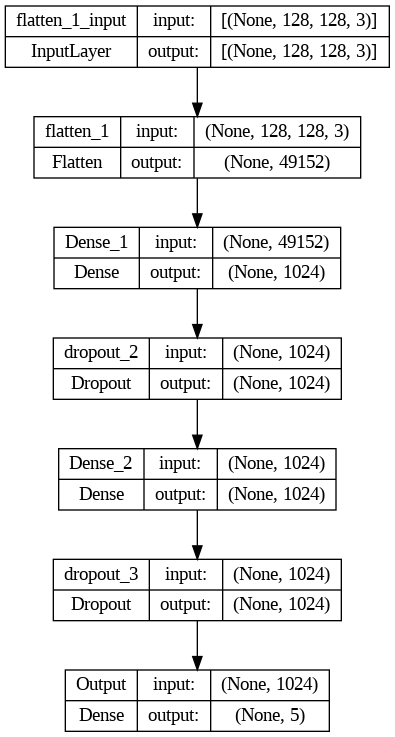

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(128,128,3)))
model.add(Dense(name='Dense_1', units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(name='Dense_2', units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(name='Output', units=5, activation='softmax'))
model.summary()
plot_model(model, to_file="mlp.png", show_shapes=True)


In [ ]:
#
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/mlp.h5', verbose=1, save_best_only=True, save_weights_only=True, monitor='val_accuracy')
callbacks = [checkpointer]

sgd = SGD(learning_rate=0.001, momentum=0.09)
model.compile(optimizer=sgd, metrics=['accuracy'], loss="categorical_crossentropy")
h = model.fit(train_ds, epochs=40, batch_size=16, verbose=1, shuffle=True,
            validation_data=val_ds,
            callbacks=callbacks
          )
model.save("/content/drive/MyDrive/mlp.h5")


Epoch 1/40
157/157 [==============================] - ETA: 0s - loss: 1.5792 - accuracy: 0.2576
Epoch 1: val_accuracy improved from -inf to 0.28905, saving model to /content/drive/MyDrive/mlp.h5
157/157 [==============================] - 23s 134ms/step - loss: 1.5792 - accuracy: 0.2576 - val_loss: 1.5335 - val_accuracy: 0.2890
Epoch 2/40
155/157 [============================>.] - ETA: 0s - loss: 1.5574 - accuracy: 0.2740
Epoch 2: val_accuracy improved from 0.28905 to 0.36984, saving model to /content/drive/MyDrive/mlp.h5
157/157 [==============================] - 22s 135ms/step - loss: 1.5564 - accuracy: 0.2743 - val_loss: 1.5117 - val_accuracy: 0.3698
Epoch 3/40
157/157 [==============================] - ETA: 0s - loss: 1.5391 - accuracy: 0.2781
Epoch 3: val_accuracy did not improve from 0.36984
157/157 [==============================] - 21s 127ms/step - loss: 1.5391 - accuracy: 0.2781 - val_loss: 1.4975 - val_accuracy: 0.3537
Epoch 4/40
157/157 [==============================] - ETA:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


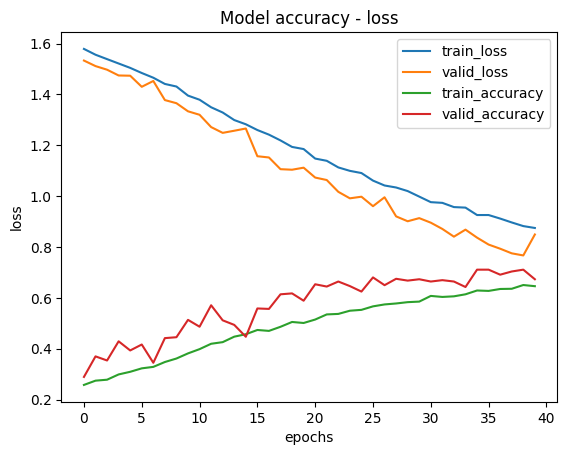

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title("Model accuracy - loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train_loss', 'valid_loss', 'train_accuracy', 'valid_accuracy'], loc='upper right')
plt.show()

In [13]:
file_model = '/content/drive/MyDrive/mlp.h5'

loaded_model = load_model(file_model)


In [12]:
results = loaded_model.evaluate(test_ds, batch_size=8)
print("test loss, test acc:", results)

19/19 [==============================] - 6s 180ms/step - loss: 270.5723 - accuracy: 0.0287
test loss, test acc: [270.5722961425781, 0.02871621586382389]


# **CNN**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 128, 128, 128)     3584      
                                                                 
 MaxPooling2D_1 (MaxPooling  (None, 64, 64, 128)       0         
 2D)                                                             
                                                                 
 Conv2D_2 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 MaxPooling2D_2 (MaxPooling  (None, 32, 32, 256)       0         
 2D)                                                             
                                                                 
 Conv2D_3 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 flatten (Flatten)           (None, 524288)           

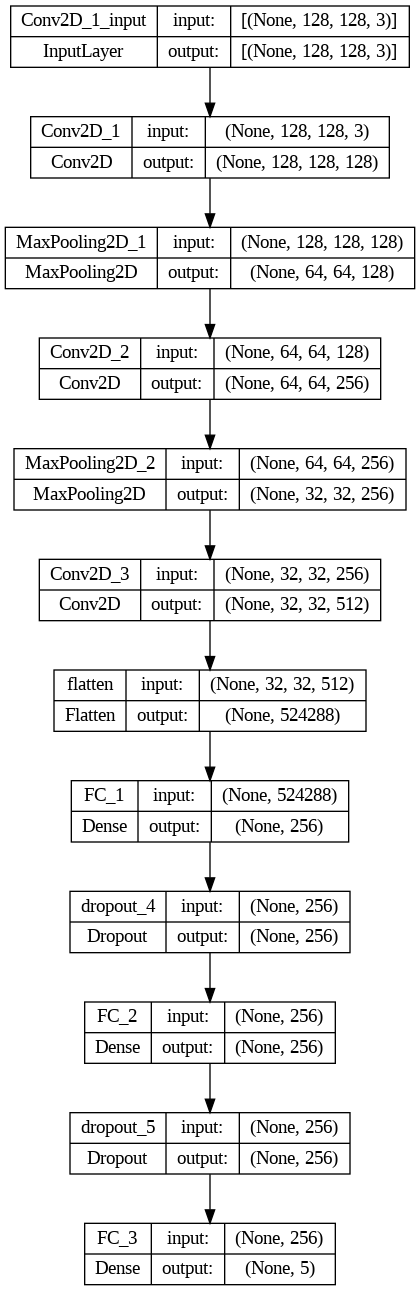

In [ ]:
model = Sequential()

model.add(Conv2D(128, (3,3), padding='same',
                 activation='relu',
                 input_shape=(128,128,3),
                 name='Conv2D_1'))
model.add(MaxPooling2D(name='MaxPooling2D_1'))
model.add(Conv2D(256, (3,3), padding='same', activation='relu', name='Conv2D_2'))
model.add(MaxPooling2D(name='MaxPooling2D_2'))
model.add(Conv2D(512, (3,3), padding='same', activation='relu', name='Conv2D_3'))


model.add(Flatten(name='flatten'))
model.add(Dense(256, activation='relu', name='FC_1'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', name='FC_2'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax', name='FC_3'))
model.summary()
plot_model(model, to_file="cnn.png", show_shapes=True)


In [ ]:
# cnn
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/cnn.h5', verbose=1, save_best_only=True, save_weights_only=True, monitor='val_accuracy')
callbacks = [checkpointer]

sgd = SGD(learning_rate=0.001, momentum=0.09)
model.compile(optimizer=sgd, metrics=['accuracy'], loss="categorical_crossentropy")
h = model.fit(train_ds, epochs=40, batch_size=16, verbose=1, shuffle=True,
            validation_data=val_ds,
            callbacks=callbacks
          )
model.save("/content/drive/MyDrive/cnn.h5")


Epoch 1/40
65/65 [==============================] - ETA: 0s - loss: 1.2501 - accuracy: 0.4532
Epoch 1: val_accuracy improved from -inf to 0.42105, saving model to /content/drive/MyDrive/cnn.h5
65/65 [==============================] - 26s 262ms/step - loss: 1.2501 - accuracy: 0.4532 - val_loss: 1.0163 - val_accuracy: 0.4211
Epoch 2/40
64/65 [============================>.] - ETA: 0s - loss: 1.0673 - accuracy: 0.4751
Epoch 2: val_accuracy improved from 0.42105 to 0.52632, saving model to /content/drive/MyDrive/cnn.h5
65/65 [==============================] - 20s 301ms/step - loss: 1.0675 - accuracy: 0.4756 - val_loss: 0.9631 - val_accuracy: 0.5263
Epoch 3/40
64/65 [============================>.] - ETA: 0s - loss: 1.0678 - accuracy: 0.4492
Epoch 3: val_accuracy did not improve from 0.52632
65/65 [==============================] - 10s 124ms/step - loss: 1.0679 - accuracy: 0.4493 - val_loss: 0.9599 - val_accuracy: 0.4386
Epoch 4/40
64/65 [============================>.] - ETA: 0s - loss: 1.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


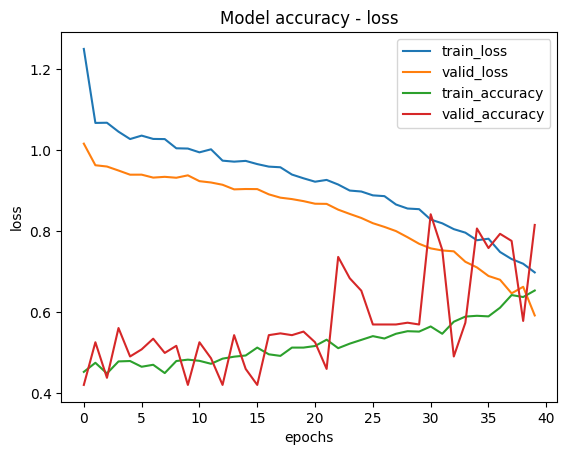

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title("Model accuracy - loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train_loss', 'valid_loss', 'train_accuracy', 'valid_accuracy'], loc='upper right')
plt.show()

In [15]:
file_model = '/content/drive/MyDrive/cnn.h5'

loaded_model = load_model(file_model)


In [16]:
results = loaded_model.evaluate(test_ds, batch_size=8)
print("test loss, test acc:", results)

19/19 [==============================] - 44s 2s/step - loss: 262.9800 - accuracy: 0.2247
test loss, test acc: [262.98004150390625, 0.2246621549129486]


# **Resnet50**

In [ ]:
def identity_block(X, filters, f=3):
 F1, F2, F3 = filters

 shortcut = X

 # 1 Convolution 1x1
 X = Conv2D(filters=F1, kernel_size=1, padding='valid')(X)
 X = BatchNormalization(axis = 3)(X)
 X = Activation('relu')(X)
 # 2 Convolution 3x3
 X = Conv2D(filters=F2, kernel_size=f, padding='same')(X)
 X = BatchNormalization(axis = 3)(X)
 X = Activation('relu')(X)
 # 3 Convolution 1x1
 X = Conv2D(filters=F3, kernel_size=1, padding='valid')(X)
 X = BatchNormalization(axis = 3)(X)
#  X = Activation('relu')(X)
 # 4 shortcut
 X = Add()([shortcut,X])
 X = Activation('relu')(X)
 return X

In [ ]:
# input_shape = (32,32,16)
# input = Input(shape = input_shape)
# output = identity_block(input, filters=[16,16,16])
# model = Model(inputs=input, outputs=output)
# print(model.summary())

In [ ]:
def convolutional_block(input_tensor, filters, s, f=3): #f=3, s=2
 F1, F2, F3 = filters

 # Lưu giá trị Input (tạo shortcut)
#  shortcut = X
 # 1. Convolution 1x1
 X = Conv2D(filters=F1, kernel_size=1, strides=(s,s), padding='valid')(input_tensor)
 X = BatchNormalization(axis = 3)(X)
 X = Activation('relu')(X)
 # 2. Convolution 3x3
 X = Conv2D(filters=F2, kernel_size=f, padding='same', strides=(1,1))(X)
 X = BatchNormalization(axis = 3)(X)
 X = Activation('relu')(X)
 # 3. Convolution 1x1
 X = Conv2D(filters=F3, kernel_size=1, padding='valid', strides=(1,1))(X)
 X = BatchNormalization(axis = 3)(X)

 # 4. Convolutional shortcut
 shortcut = Conv2D(filters=F3, kernel_size=1, strides=(s,s), padding='valid')(input_tensor)
 shortcut = BatchNormalization(axis = 3)(shortcut)

 # 5. Shortcut

 X = Add()([X, shortcut])
 X = Activation('relu')(X)
 return X

In [ ]:
# input = Input(shape=(32,32,16))
# f = 3
# s = 2
# output = convolutional_block(input, filters=[16,16,16],f=f, s=s)
# model = Model(inputs=input, outputs=output)
# print(model.summary())


Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 32, 32, 16)]         0         []                            
                                                                                                  
 conv2d_301 (Conv2D)         (None, 16, 16, 16)           272       ['input_15[0][0]']            
                                                                                                  
 batch_normalization_301 (B  (None, 16, 16, 16)           64        ['conv2d_301[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_270 (Activation  (None, 16, 16, 16)           0         ['batch_normalization_3

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 134, 134, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 64)           9472      ['zero_padding2d[0][0]']      
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 64)           256       ['conv2d[0][0]']          

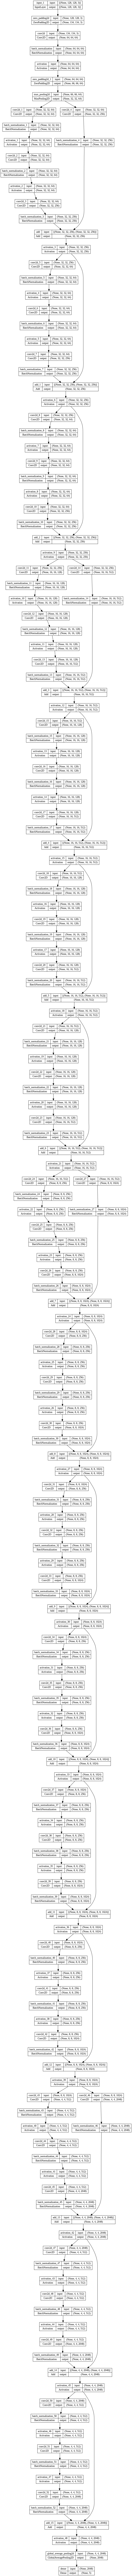

In [ ]:
import tensorflow as tf
from keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Add
from keras.models import Model

def ResNet50(input_shape=(128, 128, 3), classes=5):
 input = Input(input_shape)

 # Zero-Padding
 X = ZeroPadding2D((3, 3))(input)

 # Stage 1: 1 tầng
 X = Conv2D(64, (7, 7), strides=(2, 2))(X)
 X = BatchNormalization(axis=3)(X)
 X = Activation('relu')(X)
 X = ZeroPadding2D((1, 1))(X)
 X = MaxPooling2D((3, 3), strides=(2, 2))(X)


 # Stage 2: 3x3 = 9 tầng
 X = convolutional_block(X, filters=[64, 64, 256], s=1)
 X = identity_block(X, filters=[64, 64, 256])
 X = identity_block(X, filters=[64, 64, 256])
 # Stage 3: 3x4 = 12 tầng
 X = convolutional_block(X, filters=[128,128,512], s=2)
 X = identity_block(X, filters=[128,128,512])
 X = identity_block(X, filters=[128,128,512])
 X = identity_block(X, filters=[128,128,512])

 # Stage 4: 3x6 = 18 tầng
 X = convolutional_block(X, filters=[256,256,1024], s=2)
 X = identity_block(X, filters=[256, 256, 1024])
 X = identity_block(X, filters=[256, 256, 1024])
 X = identity_block(X, filters=[256, 256, 1024])
 X = identity_block(X, filters=[256, 256, 1024])
 X = identity_block(X, filters=[256, 256, 1024])
 # Stage 5: 3x3 = 9 tầng
 X = convolutional_block(X, filters=[512,512,2048], s=2)
 X = identity_block(X, filters=[512,512,2048])
 X = identity_block(X, filters=[512,512,2048])

 X = GlobalAveragePooling2D()(X)
 # output layer
#  X = Flatten()(X)
 X = Dense(classes, activation='softmax')(X)


 # Tạo model
 model = Model(inputs=input, outputs=X)
 return model
model = ResNet50()
print(model.summary())
plot_model(model, to_file="mlp.png", show_shapes=True)




In [ ]:
sgd = SGD(learning_rate=0.001, momentum=0.9)

model.compile(optimizer=sgd, metrics=['accuracy'], loss="categorical_crossentropy")

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/resnet50.h5', verbose=1, save_best_only=True, save_weights_only=True, monitor='val_accuracy')
callbacks = [checkpointer]
h = model.fit(train_ds, epochs=40, batch_size=16, verbose=1, shuffle=True,
            validation_data=val_ds,
            callbacks=callbacks
          )
model.save("/content/drive/MyDrive/resnet50.h5")

Epoch 1/40
65/65 [==============================] - ETA: 0s - loss: 1.1572 - accuracy: 0.5322
Epoch 1: val_accuracy improved from -inf to 0.48246, saving model to /content/drive/MyDrive/resnet50.h5
65/65 [==============================] - 343s 5s/step - loss: 1.1572 - accuracy: 0.5322 - val_loss: 1.0790 - val_accuracy: 0.4825
Epoch 2/40
65/65 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.7895
Epoch 2: val_accuracy did not improve from 0.48246
65/65 [==============================] - 11s 156ms/step - loss: 0.5568 - accuracy: 0.7895 - val_loss: 1.2015 - val_accuracy: 0.4211
Epoch 3/40
65/65 [==============================] - ETA: 0s - loss: 0.4218 - accuracy: 0.8314
Epoch 3: val_accuracy did not improve from 0.48246
65/65 [==============================] - 11s 153ms/step - loss: 0.4218 - accuracy: 0.8314 - val_loss: 1.0872 - val_accuracy: 0.4649
Epoch 4/40
64/65 [============================>.] - ETA: 0s - loss: 0.2474 - accuracy: 0.8945
Epoch 4: val_accuracy im

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


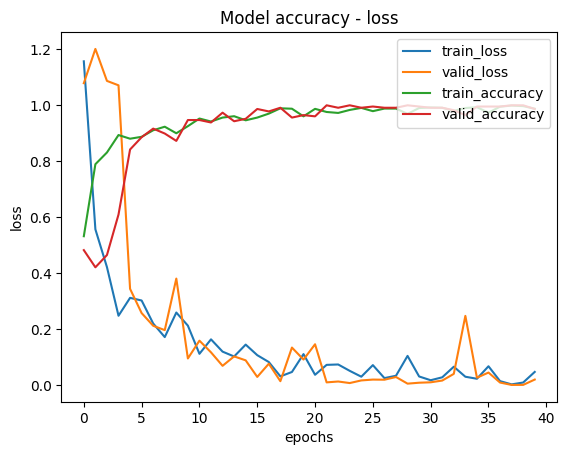

In [ ]:
plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title("Model accuracy - loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train_loss', 'valid_loss', 'train_accuracy', 'valid_accuracy'], loc='upper right')
plt.show()

13/13 [==============================] - 2s 122ms/step


<Figure size 1000x800 with 0 Axes>

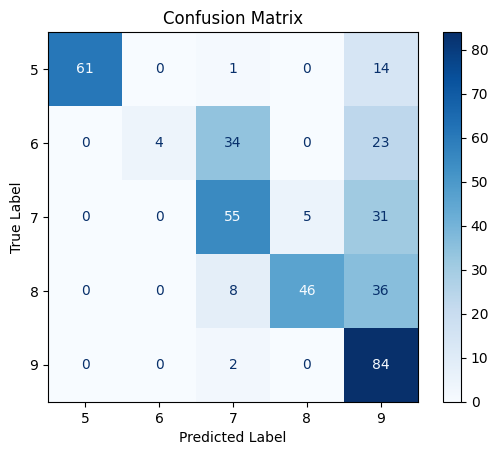

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = np.argmax(model.predict(X_test), axis=1)

# Lấy nhãn thực tế của dữ liệu kiểm tra
true_labels = np.argmax(y_test, axis=1)  # y_test là nhãn one-hot

# Tạo confusion matrix
cm = confusion_matrix(true_labels, y_pred)

# Hiển thị confusion matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
file_model = '/content/drive/MyDrive/HandDetection/resnet50.h5'

loaded_model = load_model(file_model)


In [ ]:
def test_predict(test_img):
    labels = ["5", "6", "7", "8", "9"]
    img = cv2.imread(test_img)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resize = cv2.resize(img_rgb, (160, 160))
    img_arr = np.asarray(img_resize)
    img_arr = np.expand_dims(img_arr, axis=0) #Thêm chiều None (batch_size) vào [(None, 160, 160, 3)] để phù hợp vs model

    print('Shape test', img_arr.shape)
    pred = loaded_model.predict(img_arr)
    print(pred)
    itemindex = np.where(pred == np.max(pred))
    print('itemindex:{}'.format(itemindex))
    prediction = itemindex[1][0]
    print("probability: " + str(np.max(pred) * 100) + "%\nPredicted class : ", labels[prediction])

    img = cv2.imread(test_img)
    plt.imshow(img)
file_model = '/content/drive/MyDrive/HandDetection/resnet50.h5'

loaded_model = load_model(file_model)

# print('Đánh giá')

# h = loaded_model.fit(X, y, epochs=16, batch_size=32, verbose=1
#           # ,validation_data=(X, y_test)
#           )

test_predict('/content/drive/MyDrive/HandDetection/ultralytics-8.1.9/ultralytics/models/yolo/detect/phone-8/train/images/phone00949_png.rf.886411ec53412fd6319c436e70c8cf45.jpg')


OSError: No file or directory found at /content/drive/MyDrive/HandDetection/model_vgg16(1).h5

# **Resnet50 Feature Extractor**

In [36]:
# from keras.applications import ResNet50
# from tensorflow import keras

# def ResNet50_Transfer():

#   inputs = keras.Input(shape=(128, 128, 3))

#   data_augmentation = keras.Sequential([layers.Resizing(256, 256),
#                                           layers.GaussianNoise(0.2),
#                                           layers.RandomFlip("horizontal"),
#                                           layers.RandomRotation(0.1),
#                                           layers.RandomZoom(0.2),
#                                           ])(inputs)

#   base_model = ResNet50(weights='imagenet', include_top=False,
#                         # input_shape=(128, 128, 3)
#                         input_tensor=data_augmentation)
#   # base_model.trainable = True
#   # print(base_model.summary())

#   num_layers_finetune = 4
#   num_layers = len(base_model.layers)
#   # for layer in base_model.layers[ : num_layers-num_layers_finetune]:
#   for layer in base_model.layers:
#       layer.trainable = False

#   x = base_model.output
# #   x = convolutional_block(x, filters=[256,256,1024], s=2)
# #   x = identity_block(x, filters=[256, 256, 1024])
# #   x = identity_block(x, filters=[256, 256, 1024])
# #   x = identity_block(x, filters=[256, 256, 1024])
# #   x = identity_block(x, filters=[256, 256, 1024])
# #   x = identity_block(x, filters=[256, 256, 1024])
# #  # Stage 5: 3x3 = 9 tầng
# #   x = convolutional_block(x, filters=[512,512,2048], s=2)
# #   x = identity_block(x, filters=[512,512,2048])
# #   x = identity_block(x, filters=[512,512,2048])


#   x = GlobalAveragePooling2D()(x)
#   # x = Dense(256, activation='relu')(x)
#   # x = Dropout(0.5)(x)
#   label = Dense(5, activation="softmax", name="class_label")(label)

#   # Nhánh bounding box
#   bbox = Dense(4, activation="sigmoid", name="bounding_box")(bbox)

#   # outputs = Dense(5, activation='softmax')(x)

# # Create a new model
#   model = Model(inputs=inputs, outputs=[label, bbox])
#   losses = {
#     "class_label": "categorical_crossentropy",
#     "bounding_box": "mean_squared_error",
#   }

#   # Định nghĩa losses cho các hàm lossWeights
#   lossWeights = {
#    "class_label": 1.0,
#    "bounding_box": 1.0
#   }

#   # Khởi tạo optimizer
#   opt = SGD(learning_rate=0.001, momentum=0.09)
#   model.compile(loss=losses, optimizer=opt,
#                 metrics={"class_label": "accuracy",
#                           "bounding_box": "accuracy"},
#                 loss_weights=lossWeights)

#   # print(model.summary())
#   return model
from keras.applications import ResNet50
from tensorflow import keras
from keras import layers, Model

def ResNet50_Transfer_box():

    inputs = keras.Input(shape=(128, 128, 3))

    data_augmentation = keras.Sequential([
        # layers.Resizing(256, 256),
        layers.GaussianNoise(0.2),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ])(inputs)

    base_model = ResNet50(weights='imagenet', include_top=False,
                          input_tensor=data_augmentation)

    # Đóng băng các lớp trong base_model
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Conv2D(filters=128, kernel_size=1, padding='valid')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=1, padding='valid')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=1, padding='valid')(x)


    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    label = layers.Dense(5, activation="softmax", name="class_label")(x)

    bbox = layers.Dense(4, activation="sigmoid", name="bounding_box")(x)

    model = Model(inputs=inputs, outputs=[label, bbox])
    losses = {
        "class_label": "categorical_crossentropy",
        "bounding_box": "mean_squared_error",
    }

    # Định nghĩa losses cho các hàm lossWeights
    lossWeights = {
        "class_label": 1.0,
        "bounding_box": 1.0
    }

    # Khởi tạo optimizer
    opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.09)
    model.compile(loss=losses, optimizer=opt,
                  metrics={"class_label": "accuracy",
                           "bounding_box": "accuracy"},
                  loss_weights=lossWeights)

    return model


In [37]:
model = ResNet50_Transfer_box()
print(model.summary())
# plot_model(model, to_file="resnet50featureextractor.png", show_shapes=True)


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 sequential_7 (Sequential)   (None, 128, 128, 3)          0         ['input_11[0][0]']            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['sequential_7[0][0]']        
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                           

In [38]:
# resnet152
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/resnet50_transfer_box.h5', verbose=1, save_best_only=True, save_weights_only=True, monitor='class_label_accuracy')
callbacks = [checkpointer]

# sgd = SGD(learning_rate=0.001)
# model.compile(optimizer=sgd, metrics=['accuracy'], loss="categorical_crossentropy")
h = model.fit(x = images_train, y = [labels_train, bboxes_train], epochs=40, batch_size=16, verbose=1,
            validation_data=(images_valid, [labels_valid, bboxes_valid]),
            callbacks=callbacks,
              shuffle=True
          )
model.save("/content/drive/MyDrive/resnet50_transfer_box.h5")


Epoch 1/40
314/314 [==============================] - ETA: 0s - loss: 1.7525 - class_label_loss: 1.6642 - bounding_box_loss: 0.0882 - class_label_accuracy: 0.1970 - bounding_box_accuracy: 0.3362
Epoch 1: class_label_accuracy improved from -inf to 0.19705, saving model to /content/drive/MyDrive/resnet50_transfer_box.h5
314/314 [==============================] - 28s 73ms/step - loss: 1.7525 - class_label_loss: 1.6642 - bounding_box_loss: 0.0882 - class_label_accuracy: 0.1970 - bounding_box_accuracy: 0.3362 - val_loss: 1.6871 - val_class_label_loss: 1.6086 - val_bounding_box_loss: 0.0784 - val_class_label_accuracy: 0.2334 - val_bounding_box_accuracy: 0.6768
Epoch 2/40
313/314 [============================>.] - ETA: 0s - loss: 1.7113 - class_label_loss: 1.6488 - bounding_box_loss: 0.0625 - class_label_accuracy: 0.2031 - bounding_box_accuracy: 0.5094
Epoch 2: class_label_accuracy improved from 0.19705 to 0.20303, saving model to /content/drive/MyDrive/resnet50_transfer_box.h5
314/314 [=====

KeyboardInterrupt: 

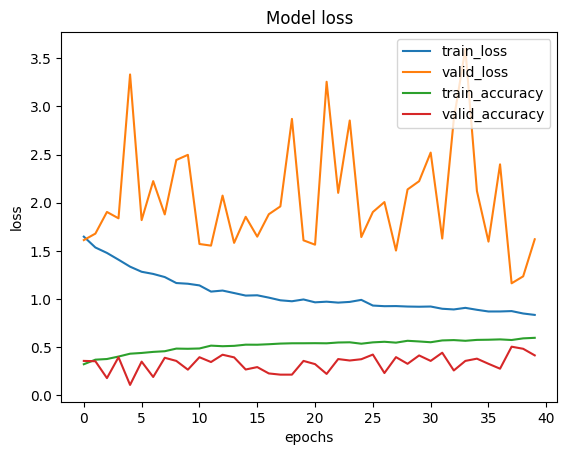

In [ ]:
# resnet finetune
plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train_loss', 'valid_loss', 'train_accuracy', 'valid_accuracy'], loc='upper right')
plt.show()


# **nobox**

In [22]:
from keras.applications import ResNet50
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

def ResNet50_Transfer_nobox():
    inputs = keras.Input(shape=(128, 128, 3))

    data_augmentation = keras.Sequential([
        layers.Resizing(256, 256),
        layers.GaussianNoise(0.2),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ])(inputs)

    base_model = ResNet50(weights='imagenet', include_top=False,
                          input_tensor=data_augmentation)

    num_layers_finetune = 4
    num_layers = len(base_model.layers)
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    x = Conv2D(filters=64, kernel_size=1, padding='valid')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=1, padding='valid')(x)
    x = BatchNormalization(axis = 3)(x)
    x = Activation('relu')(x)

    x = layers.GlobalAveragePooling2D()(x)

    label = layers.Dense(5, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=label)
    return model

# Test
model = ResNet50_Transfer_nobox()
print(model.summary())
# plot_model(model, to_file="mlp.png", show_shapes=True)


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 sequential_9 (Sequential)   (None, 256, 256, 3)          0         ['input_10[0][0]']            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['sequential_9[0][0]']        
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                            

In [23]:
sgd = SGD(learning_rate=0.001, momentum=0.9)

model.compile(optimizer=sgd, metrics=['accuracy'], loss="categorical_crossentropy")

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/resnet50_transfer_nobox.h5', verbose=1, save_best_only=True, save_weights_only=True, monitor='val_accuracy')
callbacks = [checkpointer]
h = model.fit(train_ds, epochs=80, batch_size=16, verbose=1, shuffle=True,
            validation_data=val_ds,
            callbacks=callbacks
          )
model.save("/content/drive/MyDrive/resnet50_transfer_nobox.h5")

Epoch 1/80
54/54 [==============================] - ETA: 0s - loss: 0.8936 - accuracy: 0.5224
Epoch 1: val_accuracy improved from -inf to 0.48168, saving model to /content/drive/MyDrive/resnet50_transfer_nobox.h5
54/54 [==============================] - 24s 351ms/step - loss: 0.8936 - accuracy: 0.5224 - val_loss: 0.8973 - val_accuracy: 0.4817
Epoch 2/80
54/54 [==============================] - ETA: 0s - loss: 0.7335 - accuracy: 0.5771
Epoch 2: val_accuracy improved from 0.48168 to 0.51832, saving model to /content/drive/MyDrive/resnet50_transfer_nobox.h5
54/54 [==============================] - 11s 177ms/step - loss: 0.7335 - accuracy: 0.5771 - val_loss: 0.8220 - val_accuracy: 0.5183
Epoch 3/80
54/54 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.6213
Epoch 3: val_accuracy did not improve from 0.51832
54/54 [==============================] - 10s 166ms/step - loss: 0.7050 - accuracy: 0.6213 - val_loss: 0.7777 - val_accuracy: 0.5183
Epoch 4/80
54/54 [============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


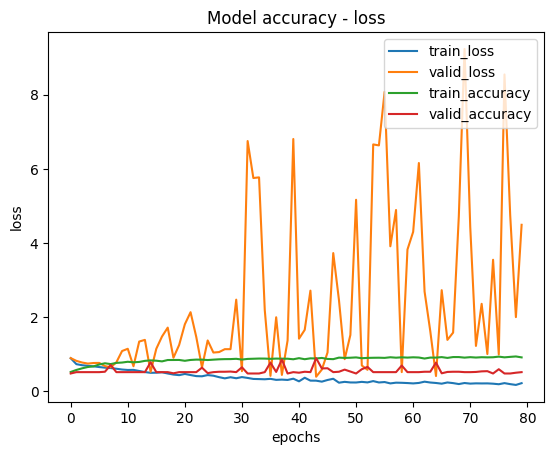

In [24]:
# resnet finetune
plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title("Model accuracy - loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train_loss', 'valid_loss', 'train_accuracy', 'valid_accuracy'], loc='upper right')
plt.show()


confusion matrix

13/13 [==============================] - 3s 112ms/step


<Figure size 1000x800 with 0 Axes>

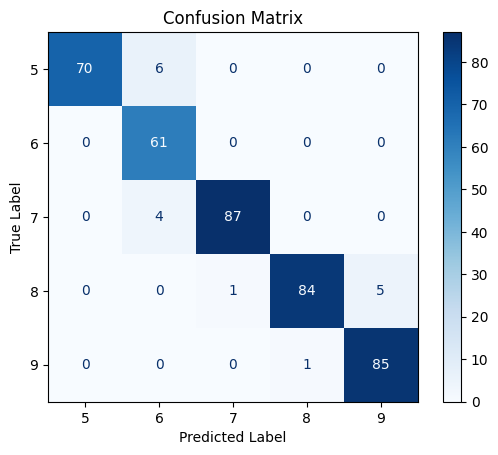

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = np.argmax(model.predict(X_test), axis=1)

# Lấy nhãn thực tế của dữ liệu kiểm tra
true_labels = np.argmax(y_test, axis=1)  # y_test là nhãn one-hot

# Tạo confusion matrix
cm = confusion_matrix(true_labels, y_pred)

# Hiển thị confusion matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
file_model = '/content/drive/MyDrive/HandDetection/resnet50_transfer_noaug.h5'

loaded_model = load_model(file_model)


In [ ]:
bla = loaded_model.evaluate(test_generator)

13/13 [==============================] - 109s 8s/step - loss: 0.1135 - accuracy: 0.9480


Shape test (1, 256, 256, 3)
1/1 [==============================] - 0s 301ms/step
[[2.9031000e-05 1.2125266e-13 4.1528114e-09 1.8459283e-03 9.9812502e-01]]
itemindex:(array([0]), array([4]))
probability: 99.81250166893005%
Predicted class :  9


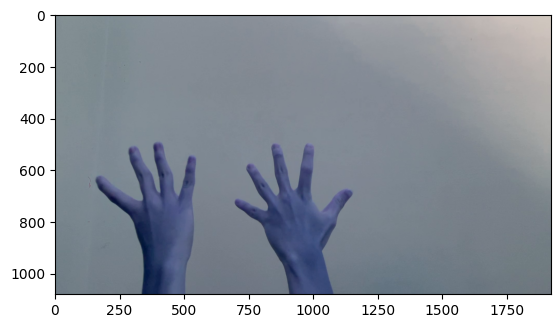

In [ ]:
def test_predict(test_img):
    labels = ["5", "6", "7", "8", "9"]
    img = cv2.imread(test_img)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resize = cv2.resize(img_rgb, (256, 256))
    img_arr = np.asarray(img_resize)
    img_arr = np.expand_dims(img_arr, axis=0) #Thêm chiều None (batch_size) vào [(None, 160, 160, 3)] để phù hợp vs model

    print('Shape test', img_arr.shape)
    pred = loaded_model.predict(img_arr)
    print(pred)
    itemindex = np.where(pred == np.max(pred))
    print('itemindex:{}'.format(itemindex))
    prediction = itemindex[1][0]
    print("probability: " + str(np.max(pred) * 100) + "%\nPredicted class : ", labels[prediction])

    img = cv2.imread(test_img)
    plt.imshow(img)


test_predict('/content/drive/MyDrive/img1266.png')


In [ ]:
loaded_model.evaluate(X_test, y_test, verbose=1)

13/13 [==============================] - 95s 7s/step - loss: 0.1016 - accuracy: 0.9752


[0.10157506167888641, 0.9752475023269653]

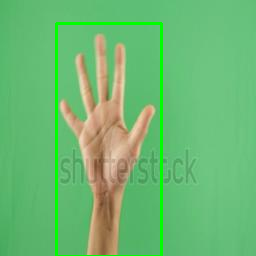

In [ ]:
# prompt: đọc ảnh và vẽ bounding box lên ảnh

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def draw_bounding_box(image, bounding_box, color=(0, 255, 0), thickness=2):
  """
  Draws a bounding box on the given image.

  Args:
    image: The image on which to draw the bounding box.
    bounding_box: A tuple containing the top-left corner coordinates and the bottom-right corner coordinates of the bounding box.
    color: The color of the bounding box.
    thickness: The thickness of the bounding box lines.

  Returns:
    The image with the bounding box drawn on it.
  """

  # Get the top-left and bottom-right corner coordinates of the bounding box.
  top_left, bottom_right = bounding_box

  # Draw the bounding box lines.
  cv2.rectangle(image, top_left, bottom_right, color, thickness)

  # Return the image with the bounding box drawn on it.
  return image

# Load the image.
image = cv2.imread('/content/drive/MyDrive/handData/img0001_png.rf.9b0ef6f49eb1ccd45a99d2e6515ba934.jpg')

# Create a bounding box.
bounding_box = ((56, 23), (161, 256))

# Draw the bounding box on the image.
image_with_bounding_box = draw_bounding_box(image, bounding_box)

# Show the image with the bounding box.
cv2_imshow(image_with_bounding_box)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load pre-trained ResNet50 model without including top layers
base_model = ResNet50(weights='imagenet', include_top=False)

# Define data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2)
])

# Add new top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define data generators
train_datagen = ImageDataGenerator(
    preprocessing_function=data_augmentation,
    rescale=1./255)  # You may need to adjust this rescaling factor

validation_datagen = ImageDataGenerator(rescale=1./255)  # No augmentation for validation data

# Define data flow from directory (adjust batch size as needed)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


# **Resnet50 finetuning FPN**

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import ResNet50
# f.keras.optimizers.Adam
from tensorflow.keras.optimizers import Adam

def feature_pyramid_network(input_shape):
    inputs = layers.Input(shape=input_shape)
    data_augmentation = keras.Sequential([
                                          layers.Resizing(256, 256),
                                          # layers.Rescaling(1.0 / 255),
                                          layers.GaussianNoise(0.2),
                                          layers.RandomFlip("horizontal"),
                                          layers.RandomRotation(0.1),
                                          layers.RandomZoom(0.2),
                                          ])(inputs)

    # Base model
    base_model = ResNet50(include_top=False,
                          input_tensor=data_augmentation,
                          weights='imagenet',
                          # input_shape=(64,64,3)
                          )
    base_model.trainable = True


    # Feature Pyramid Network (FPN)
    C3, C4, C5 = [base_model.get_layer(layer_name).output for layer_name in ["conv3_block4_out", "conv4_block6_out", "conv5_block3_out"]]

    P5 = layers.Conv2D(256, kernel_size=1, strides=1, padding='same', activation='relu')(C5)
    P4 = layers.Add()([layers.UpSampling2D(size=(2, 2))(P5), layers.Conv2D(256, kernel_size=1, strides=1, padding='same')(C4)])
    P3 = layers.Add()([layers.UpSampling2D(size=(2, 2))(P4), layers.Conv2D(256, kernel_size=1, strides=1, padding='same')(C3)])

    feature_pyramid = Model(inputs=inputs, outputs=[P3, P4, P5])
    print(feature_pyramid.summary())
    return feature_pyramid

def retina_net(num_classes, input_shape=(128, 128, 3)):
    inputs = layers.Input(shape=input_shape)

    # Feature Pyramid Network (FPN)
    feature_pyramid = feature_pyramid_network(input_shape)
    P3, P4, P5 = feature_pyramid(inputs)

    # Classification subnet
    cls_subnet = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(P3)
    # cls_subnet = layers.MaxPooling2D(3, strides=2)(cls_subnet)
    cls_subnet = layers.BatchNormalization(axis = 3)(cls_subnet)
    cls_subnet = layers.Activation('relu')(cls_subnet)

    cls_subnet = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(cls_subnet)
    # cls_subnet = layers.MaxPooling2D(3, strides=2)(cls_subnet)
    cls_subnet = layers.BatchNormalization(axis = 3)(cls_subnet)
    cls_subnet = layers.Activation('relu')(cls_subnet)

    cls_subnet = layers.Conv2D(64, kernel_size=3, padding='same', activation = 'relu')(cls_subnet)
    # cls_subnet = layers.MaxPooling2D(3, strides=2)(cls_subnet)
    cls_subnet = layers.BatchNormalization(axis = 3)(cls_subnet)
    cls_subnet = layers.Activation('relu')(cls_subnet)

    # cls_subnet = layers.MaxPooling2D(3, strides=2)(cls_subnet)
    # cls_subnet = layers.BatchNormalization(axis = 3)(cls_subnet)
    # cls_subnet = layers.Activation('relu')(cls_subnet)

    cls_subnet = layers.GlobalAveragePooling2D()(cls_subnet)
    # cls_subnet = layers.Dropout(0.3)(cls_subnet)
    # cls_subnet = layers.Dense(512, activation='softmax')(cls_subnet)
    cls_subnet = layers.Dense(512, activation='relu')(cls_subnet)
    cls_subnet = layers.Dropout(0.5)(cls_subnet)
    # cls_subnet = layers.Dense(512, activation='relu')(cls_subnet)
    # cls_subnet = layers.Dropout(0.5)(cls_subnet)
    cls_subnet = layers.Dense(num_classes, activation='softmax', name='cls_subnet')(cls_subnet)


    # Bounding Box regression subnet
    box_subnet = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(P3)
    box_subnet = layers.BatchNormalization(axis=3)(box_subnet)
    box_subnet = layers.Activation('relu')(box_subnet)

    box_subnet = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(box_subnet)
    box_subnet = layers.BatchNormalization(axis=3)(box_subnet)
    box_subnet = layers.Activation('relu')(box_subnet)

    box_subnet = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(box_subnet)
    box_subnet = layers.BatchNormalization(axis=3)(box_subnet)
    box_subnet = layers.Activation('relu')(box_subnet)
    # box_subnet = layers.MaxPooling2D(3, strides=2)(box_subnet)

    # box_subnet = layers.BatchNormalization(axis=3)(box_subnet)
    # box_subnet = layers.Activation('relu')(box_subnet)

    box_subnet = layers.GlobalAveragePooling2D()(box_subnet)
    # box_subnet = layers.Dropout(0.3)(box_subnet)
    # box_subnet = layers.Dense(512, activation='softmax')(box_subnet)
    box_subnet = layers.Dense(512, activation='relu')(box_subnet)
    box_subnet = layers.Dropout(0.5)(box_subnet)
    # box_subnet = layers.Dense(512, activation='relu')(box_subnet)
    # box_subnet = layers.Dropout(0.5)(box_subnet)
    box_subnet = layers.Dense(4, activation='sigmoid', name='box_subnet')(box_subnet)

    model = Model(inputs=inputs, outputs=[cls_subnet, box_subnet])
    losses = {
        "cls_subnet": "categorical_crossentropy",
        "box_subnet": "mean_squared_error",
    }
    loss_weights = {
        "cls_subnet": 1.0,
        "box_subnet": 1.0
    }

    # Compile the model
    optimizer = SGD(learning_rate=0.001, momentum=0.09)
    model.compile(loss=losses, optimizer=optimizer, metrics={"cls_subnet": "accuracy",
                                                             "box_subnet": "accuracy"},
                  loss_weights=loss_weights)
    return model

# Sử dụng mạng RetinaNet
num_classes = 5  # Số lớp đối tượng cần phát hiện
model = retina_net(num_classes)

# Tải mô hình đã được train (nếu có)
# model.load_weights('path_to_pretrained_weights.h5')

# Đưa model vào chế độ evaluation
# model.compile(optimizer='adam', loss=['categorical_crossentropy', 'smooth_l1'])

# In ra cấu trúc của mạng
model.summary()




Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 256, 256, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['sequential_2[0][0]']        
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                            

In [13]:
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/resnet50_finetuning_fpn.h5', verbose=1, save_best_only=True, save_weights_only=True, monitor='box_subnet_accuracy')
callbacks = [checkpointer]

h = model.fit(x = images_train, y = [labels_train, bboxes_train], epochs=40, batch_size=16, verbose=1,
            validation_data=(images_valid, [labels_valid, bboxes_valid]),
            callbacks=callbacks,
              shuffle=True
          )
# h = model.fit(images_train_ds, epochs=40, batch_size=16, verbose=1,
#             validation_data=images_valid_ds,
#             callbacks=callbacks,
#               shuffle=True
#           )
model.save("/content/drive/MyDrive/resnet50_finetuning_fpn.h5")

Epoch 1/40
314/314 [==============================] - ETA: 0s - loss: 1.7158 - cls_subnet_loss: 1.6208 - box_subnet_loss: 0.0951 - cls_subnet_accuracy: 0.1986 - box_subnet_accuracy: 0.3126
Epoch 1: box_subnet_accuracy improved from -inf to 0.31264, saving model to /content/drive/MyDrive/resnet50_finetuning_fpn.h5
314/314 [==============================] - 98s 249ms/step - loss: 1.7158 - cls_subnet_loss: 1.6208 - box_subnet_loss: 0.0951 - cls_subnet_accuracy: 0.1986 - box_subnet_accuracy: 0.3126 - val_loss: 10.0603 - val_cls_subnet_loss: 9.9734 - val_box_subnet_loss: 0.0870 - val_cls_subnet_accuracy: 0.2154 - val_box_subnet_accuracy: 0.3232
Epoch 2/40
314/314 [==============================] - ETA: 0s - loss: 1.6923 - cls_subnet_loss: 1.6200 - box_subnet_loss: 0.0723 - cls_subnet_accuracy: 0.2082 - box_subnet_accuracy: 0.5558
Epoch 2: box_subnet_accuracy improved from 0.31264 to 0.55580, saving model to /content/drive/MyDrive/resnet50_finetuning_fpn.h5
314/314 [=========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


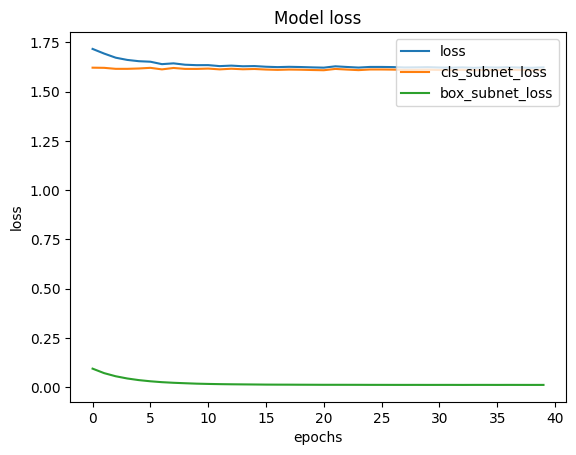

In [16]:
# resnet finetune
plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['cls_subnet_loss'])
plt.plot(h.history['box_subnet_loss'])
plt.title("Model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['loss', 'cls_subnet_loss', 'box_subnet_loss', 'val_loss'], loc='upper right')
plt.show()


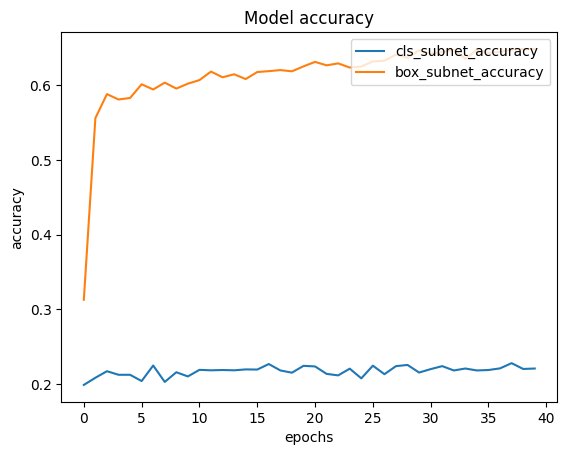

In [17]:
# resnet finetune
plt.figure()
plt.plot(h.history['cls_subnet_accuracy'])
plt.plot(h.history['box_subnet_accuracy'])
plt.title("Model accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(['cls_subnet_accuracy', 'box_subnet_accuracy'], loc='upper right')
plt.show()


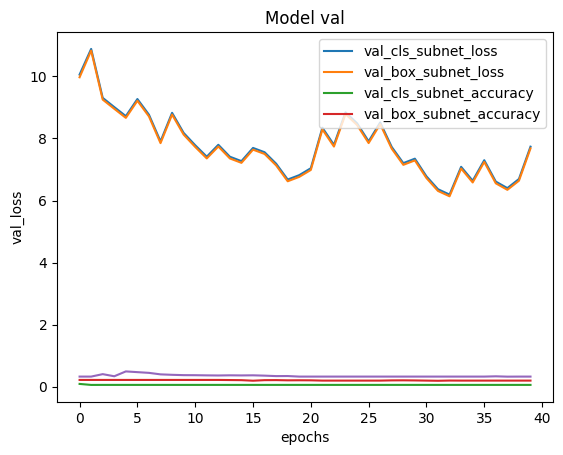

In [18]:
# resnet finetune
plt.figure()
plt.plot(h.history['val_loss'])
plt.plot(h.history['val_cls_subnet_loss'])
plt.plot(h.history['val_box_subnet_loss'])
plt.plot(h.history['val_cls_subnet_accuracy'])
plt.plot(h.history['val_box_subnet_accuracy'])
plt.title("Model val")
plt.xlabel("epochs")
plt.ylabel("val_loss")

plt.legend(['val_cls_subnet_loss', 'val_box_subnet_loss', 'val_cls_subnet_accuracy', 'val_box_subnet_accuracy'], loc='upper right')
plt.show()


In [19]:
file_model = '/content/drive/MyDrive/resnet50_finetuning_fpn.h5'

loaded_model = load_model(file_model)


1/1 [==============================] - 0s 144ms/step
pred [[0. 0. 0. 1. 0.]]
bbox [[0. 0. 1. 1.]]
itemindex: 3
probability: 100.0%
Predicted class :  8
x_min 0.0
640


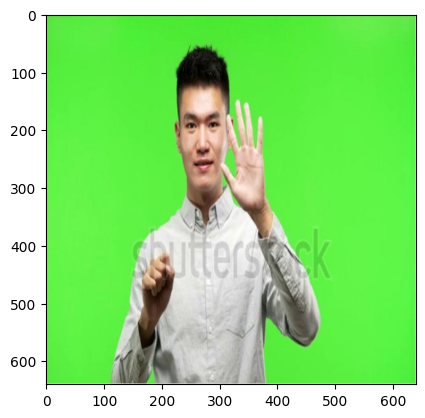

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def test_predict(test_img):
    labels = ["5", "6", "7", "8", "9"]
    img = cv2.imread(test_img)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resize = cv2.resize(img_rgb, (128, 128))
    img_arr = np.asarray(img_resize)
    img_arr = np.expand_dims(img_arr, axis=0)

    pred, bbox = loaded_model.predict(img_arr)
    print('pred', pred)
    print('bbox', bbox)
    itemindex = np.argmax(pred)
    print('itemindex:', itemindex)
    prediction = itemindex
    print("probability: " + str(np.max(pred) * 100) + "%\nPredicted class : ", labels[prediction])

    # Vẽ bounding box
    x_min, y_min, x_max, y_max = bbox[0]
    print('x_min', x_min)
    h, w, _ = img_rgb.shape
    print(h)
    x1, y1 = int(x_min * w), int(y_min * h)
    x2, y2 = int(x_max * w), int(y_max * h)
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 255, 0), 2)
    plt.imshow(img_rgb)
    plt.show()

test_predict('/content/drive/MyDrive/data_final2/hand5/img0169_png.rf.5a1cf9a120fc3dff03f0d0fad9b1826c.jpg')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def visualize_results(image, class_indices, box_predictions, class_names):
    # Sao chép ảnh để không ảnh hưởng đến ảnh gốc
    image_copy = image.copy()

    # Lấy kích thước của ảnh
    image_height, image_width, _ = image_copy.shape

    # Lặp qua từng dự đoán và vẽ bounding box
    for class_index, box_prediction in zip(class_indices, box_predictions):
        # Lấy tọa độ của bounding box
        y1, x1, y2, x2 = box_prediction

        # Chuyển đổi tọa độ bounding box về tọa độ pixel trên ảnh
        x1 = int(x1 * image_width)
        y1 = int(y1 * image_height)
        x2 = int(x2 * image_width)
        y2 = int(y2 * image_height)

        # Vẽ bounding box lên ảnh
        cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Hiển thị nhãn lớp
        class_name = class_names[class_index]
        cv2.putText(image_copy, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Hiển thị ảnh và bounding box
    plt.imshow(image_copy)
    plt.axis('off')
    plt.show()

# Định nghĩa danh sách tên lớp
class_names = ['5', '6', '7', '8', '9']

# Dữ liệu dự đoán
image =cv2.imread('/content/drive/MyDrive/img1266.png')
image = cv2.cvt(image, cv2.COLOR_BGR2RGB)
image = np.array(image)  # Ảnh ngẫu nhiên
class_indices = [0, 1, 2, 3, 4]  # Chỉ số lớp dự đoán
box_predictions = [[0.2, 0.3, 0.6, 0.7], [0.4, 0.2, 0.8, 0.5], [0.1, 0.1, 0.9, 0.9]]  # Dự đoán bounding box

# Hiển thị kết quả
visualize_results(image, class_indices, box_predictions, class_names)


In [17]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import ResNet50
# f.keras.optimizers.Adam
from tensorflow.keras.optimizers import Adam

def feature_pyramid_network(input_shape):
    inputs = layers.Input(shape=input_shape)
    data_augmentation = keras.Sequential([
                                          # layers.Resizing(256, 256),
                                          # layers.Rescaling(1.0 / 255),
                                          layers.GaussianNoise(0.2),
                                          layers.RandomFlip("horizontal"),
                                          layers.RandomRotation(0.1),
                                          layers.RandomZoom(0.2),
                                          ])(inputs)

    # Base model
    base_model = ResNet50(include_top=False,
                          input_tensor=data_augmentation,
                          weights='imagenet',
                          # input_shape=(64,64,3)
                          )
    base_model.trainable = True


    # Feature Pyramid Network (FPN)
    C3, C4, C5 = [base_model.get_layer(layer_name).output for layer_name in ["conv3_block4_out", "conv4_block6_out", "conv5_block3_out"]]

    P5 = layers.Conv2D(256, kernel_size=1, strides=1, padding='same', activation='relu')(C5)
    P4 = layers.Add()([layers.UpSampling2D(size=(2, 2))(P5), layers.Conv2D(256, kernel_size=1, strides=1, padding='same')(C4)])
    P3 = layers.Add()([layers.UpSampling2D(size=(2, 2))(P4), layers.Conv2D(256, kernel_size=1, strides=1, padding='same')(C3)])

    feature_pyramid = Model(inputs=inputs, outputs=[P3, P4, P5])
    print(feature_pyramid.summary())
    return feature_pyramid

def retina_net(num_classes, input_shape=(128, 128, 3)):
    inputs = layers.Input(shape=input_shape)

    # Feature Pyramid Network (FPN)
    feature_pyramid = feature_pyramid_network(input_shape)
    P3, P4, P5 = feature_pyramid(inputs)

    # Classification subnet
    cls_subnet = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(P3)
    # cls_subnet = layers.MaxPooling2D(3, strides=2)(cls_subnet)


    # cls_subnet = layers.MaxPooling2D(3, strides=2)(cls_subnet)
    # cls_subnet = layers.BatchNormalization(axis = 3)(cls_subnet)
    # cls_subnet = layers.Activation('relu')(cls_subnet)

    cls_subnet = layers.GlobalAveragePooling2D()(cls_subnet)
    # cls_subnet = layers.Dropout(0.3)(cls_subnet)
    # cls_subnet = layers.Dense(512, activation='softmax')(cls_subnet)
    cls_subnet = layers.Dense(256, activation='relu')(cls_subnet)
    cls_subnet = layers.Dropout(0.5)(cls_subnet)
    # cls_subnet = layers.Dense(512, activation='relu')(cls_subnet)
    # cls_subnet = layers.Dropout(0.5)(cls_subnet)
    cls_subnet = layers.Dense(num_classes, activation='softmax', name='cls_subnet')(cls_subnet)


    # Bounding Box regression subnet
    box_subnet = layers.Conv2D(64, kernel_size=3, padding='same', activation='relu')(P3)
    # box_subnet = layers.BatchNormalization(axis=3)(box_subnet)
    # box_subnet = layers.Activation('relu')(box_subnet)

    # box_subnet = layers.MaxPooling2D(3, strides=2)(box_subnet)

    # box_subnet = layers.BatchNormalization(axis=3)(box_subnet)
    # box_subnet = layers.Activation('relu')(box_subnet)

    box_subnet = layers.GlobalAveragePooling2D()(box_subnet)
    # box_subnet = layers.Dropout(0.3)(box_subnet)
    # box_subnet = layers.Dense(512, activation='softmax')(box_subnet)
    box_subnet = layers.Dense(256, activation='relu')(box_subnet)
    box_subnet = layers.Dropout(0.5)(box_subnet)
    # box_subnet = layers.Dense(512, activation='relu')(box_subnet)
    # box_subnet = layers.Dropout(0.5)(box_subnet)
    box_subnet = layers.Dense(4, activation='sigmoid', name='box_subnet')(box_subnet)

    model = Model(inputs=inputs, outputs=[cls_subnet, box_subnet])
    losses = {
        "cls_subnet": "categorical_crossentropy",
        "box_subnet": "mean_squared_error",
    }
    loss_weights = {
        "cls_subnet": 1.0,
        "box_subnet": 1.0
    }

    # Compile the model
    optimizer = SGD(learning_rate=0.001, momentum=0.09)
    # optimizer = Adam(learning_rate=0.001)

    model.compile(loss=losses, optimizer=optimizer, metrics={"cls_subnet": "accuracy",
                                                             "box_subnet": "accuracy"},
                  loss_weights=loss_weights)
    return model

# Sử dụng mạng RetinaNet
num_classes = 5  # Số lớp đối tượng cần phát hiện
model = retina_net(num_classes)

# Tải mô hình đã được train (nếu có)
# model.load_weights('path_to_pretrained_weights.h5')

# Đưa model vào chế độ evaluation
# model.compile(optimizer='adam', loss=['categorical_crossentropy', 'smooth_l1'])

# In ra cấu trúc của mạng
model.summary()




Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 sequential_5 (Sequential)   (None, 128, 128, 3)          0         ['input_12[0][0]']            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['sequential_5[0][0]']        
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                           

In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/resnet50_finetuning_fpn2.h5', verbose=1, save_best_only=True, save_weights_only=True, monitor='val_box_subnet_accuracy')
callbacks = [checkpointer]

h = model.fit(x = images_train, y = [labels_train, bboxes_train], epochs=40, batch_size=16, verbose=1,
            validation_data=(images_valid, [labels_valid, bboxes_valid]),
            callbacks=callbacks,
              shuffle=True
          )
# h = model.fit(images_train_ds, epochs=40, batch_size=16, verbose=1,
#             validation_data=images_valid_ds,
#             callbacks=callbacks,
#               shuffle=True
#           )
model.save("/content/drive/MyDrive/resnet50_finetuning_fpn2.h5")

In [19]:
file_model = '/content/drive/MyDrive/resnet50_finetuning_fpn.h5'

loaded_model = load_model(file_model)


1/1 [==============================] - 3s 3s/step
pred [[4.8860774e-04 1.6274007e-05 2.4842529e-05 8.1169553e-02 9.1830069e-01]]
bbox [[2.9174144e-15 3.0052804e-14 1.0000000e+00 1.0000000e+00]]
itemindex: 4
probability: 91.83006882667542%
Predicted class :  9
x_min 2.9174144e-15
640


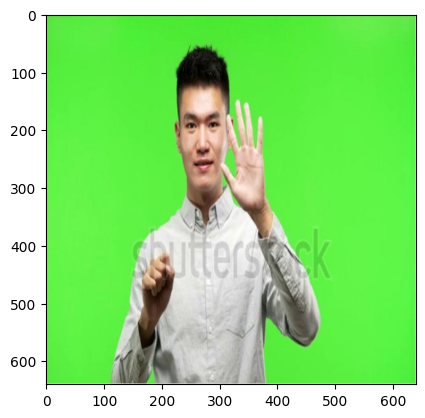

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def test_predict(test_img):
    labels = ["5", "6", "7", "8", "9"]
    img = cv2.imread(test_img)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resize = cv2.resize(img_rgb, (128, 128))
    img_arr = np.asarray(img_resize)/255.0
    img_arr = np.expand_dims(img_arr, axis=0)

    pred, bbox = loaded_model.predict(img_arr)
    print('pred', pred)
    print('bbox', bbox)
    itemindex = np.argmax(pred)
    print('itemindex:', itemindex)
    prediction = itemindex
    print("probability: " + str(np.max(pred) * 100) + "%\nPredicted class : ", labels[prediction])

    # Vẽ bounding box
    x_min, y_min, x_max, y_max = bbox[0]
    print('x_min', x_min)
    h, w, _ = img_rgb.shape
    print(h)
    x1, y1 = int(x_min * w), int(y_min * h)
    x2, y2 = int(x_max * w), int(y_max * h)
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 255, 0), 2)
    plt.imshow(img_rgb)
    plt.show()

test_predict('/content/drive/MyDrive/data_final2/hand5/img0169_png.rf.5a1cf9a120fc3dff03f0d0fad9b1826c.jpg')
